# purpose of this notebook

* Produces the color magnitude diagram for cluster 9 for the paper 
* Visualizes the rest of the color magnitude diagram for the rest of the selected clusters


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
%autoreload 2

In [5]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import sys
import numpy as np 

In [6]:
sys.path.append("../")

In [7]:
import calculate_astrophy_quantities as ca
import extract_catalog as ec
import plot_gal_prop as pg

In [8]:
data_dir = "../../data/"
data_file = "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5"
clusterID_file = "rich_cluster_ID.h5"

In [9]:
f = h5py.File(data_dir + data_file, "r")

In [10]:
cluster_h5file = h5py.File(data_dir + clusterID_file, "r")

In [15]:
clstNos = cluster_h5file["rich_cluster_ID"][:]

In [16]:
%time dfs = [ec.extract_clst(f, i) for i in clstNos]

CPU times: user 704 ms, sys: 20.3 s, total: 21 s
Wall time: 21 s


# make fig 1. in the paper 

In [ ]:
figPath = "../paper/figures/finalized/"
fileprefix = "fig"

In [ ]:
pg.plot_color_mag_diag(dfs[i], "r_band", "i_band", 15, 
                       plot=True, clst=r, subhalo_len_lim=1e3,
                       save=True, savePath=figPath, fileprefix)

# make the rest of the color-magnitude diagrams for all the clusters used for the main results 

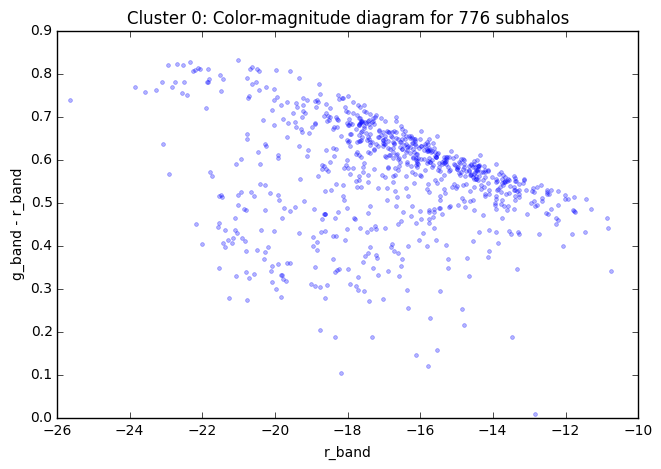

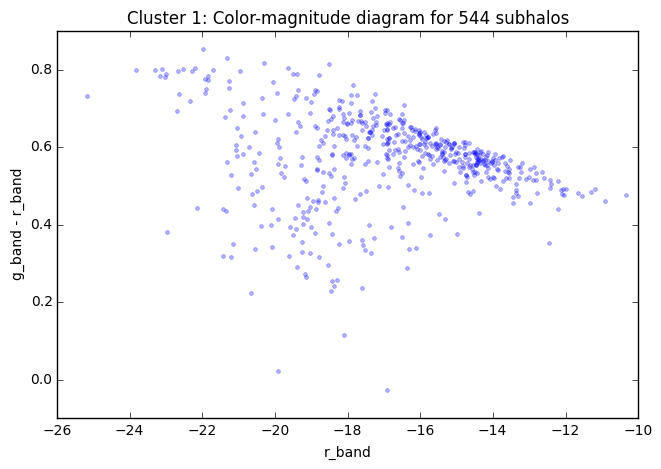

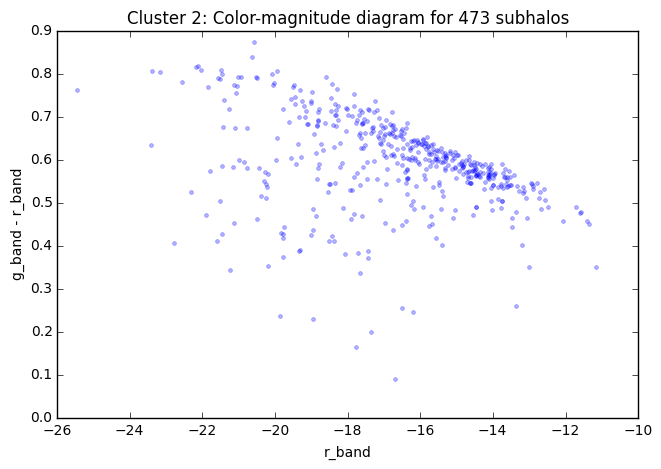

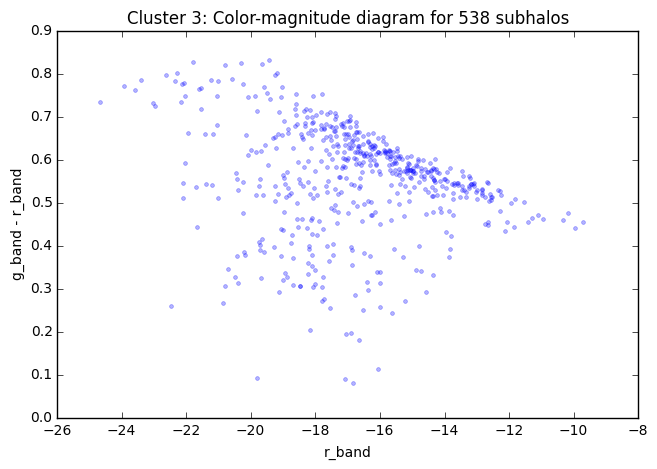

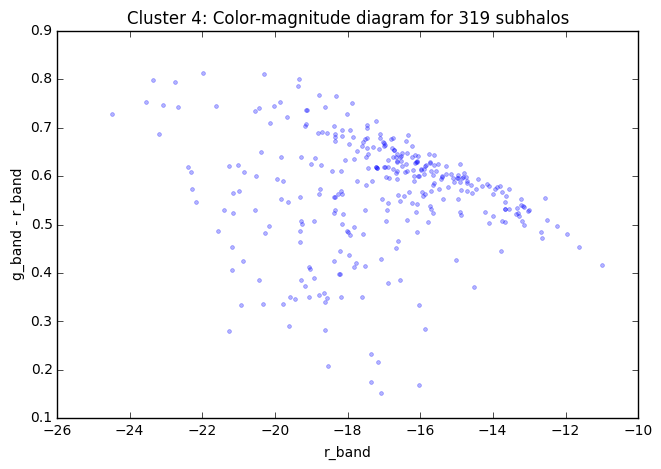

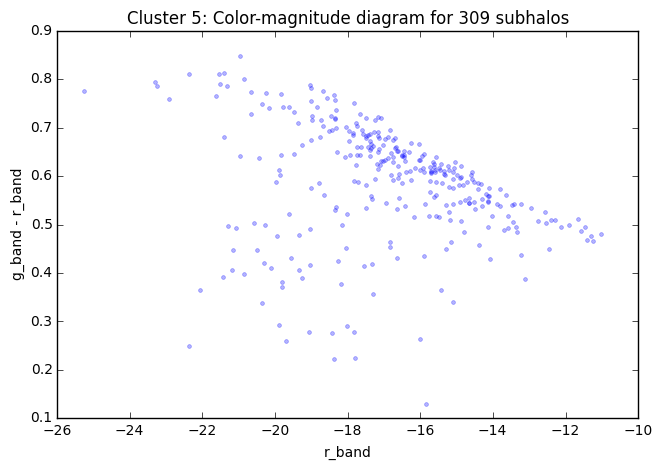

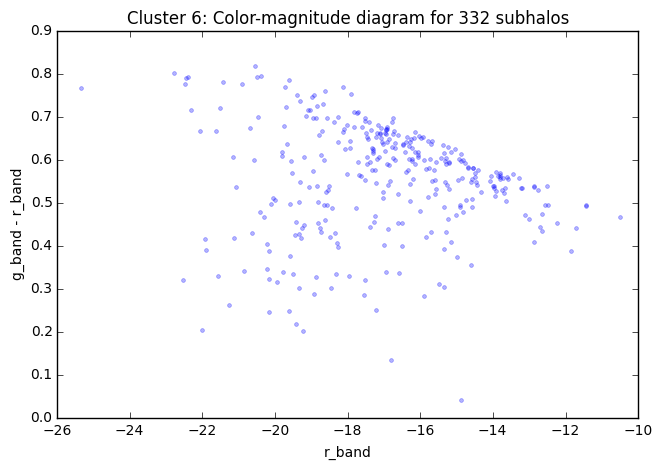

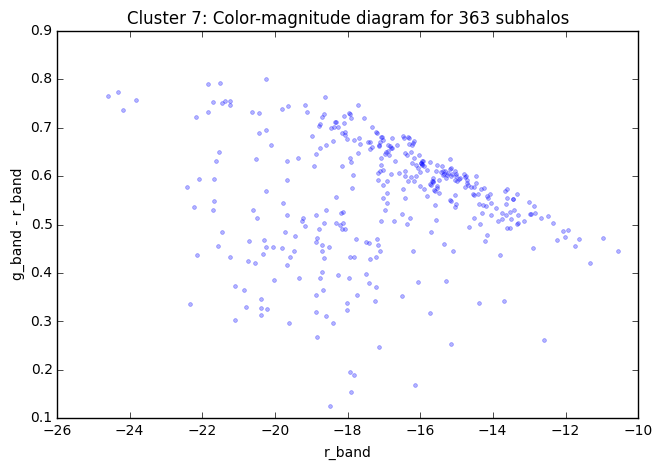

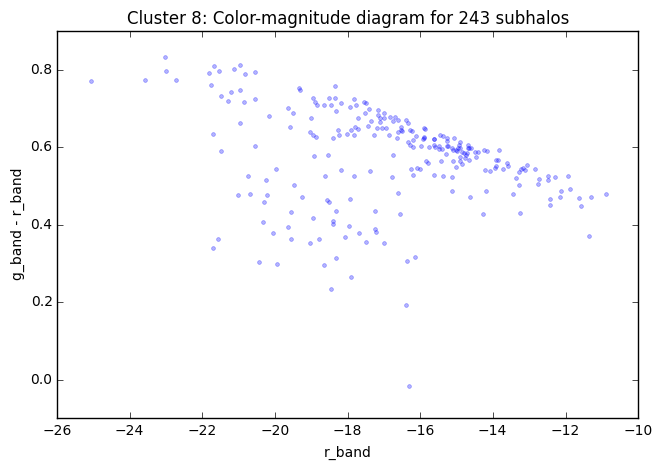

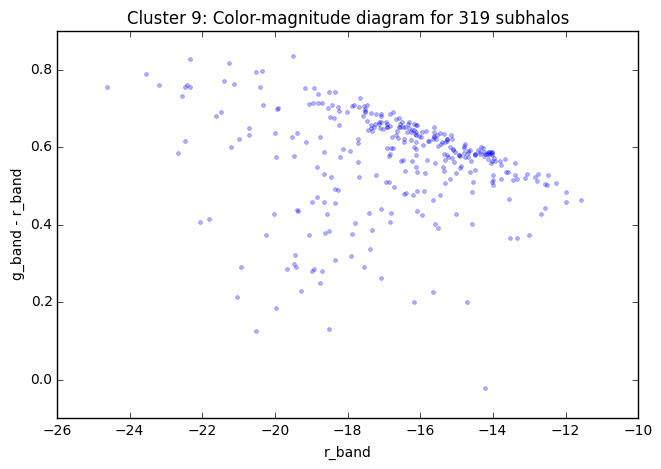

[None, None, None, None, None, None, None, None, None, None]

In [19]:
map(lambda i: pg.plot_color_mag_diag(dfs[i], "r_band", "i_band", 15, 
                        plot=True, clst=r, subhalo_len_lim=1e3,
                        save=True),
    range(len(dfs)))

In [17]:
f.close()